In [0]:
# Since the Quandl Package is not installed in Colab by default, we need to first install it
pip install quandl

In [0]:
#Quandl is used for our stock data
import quandl
#Pandas for our data frame
import pandas as pd
#Numpy for array and math functions
import numpy as np
import datetime
#For visualization
import matplotlib.pyplot as plt
%matplotlib inline
#sklearn for the regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm, datasets
from sklearn.model_selection import cross_validate, train_test_split

In [0]:
#To get our stock data, we set our dataframe to stock_data. I will us Apple, yet you can choose any stock you wish.
stock_data = quandl.get("WIKI/AAPL")
stock_data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


In [0]:
# We only need Adj. Close column for predictions
stock_data = stock_data[["Adj. Close"]]
#To predict 30 days into the future, forecast_out variable will be set
forecast_out = int(30)
#There should be another column  in our dataframe which is known as label, which in ML known-as otput
#Also label colmn will be shifted 30 unites up to fill output data with data to be trained upon
stock_data["Prediction"] = stock_data[["Adj. Close"]].shift(-forecast_out)
#Our dataframe can be viewed by printing the following:
stock_data.tail(100)

,Adj. Close,Prediction
Date,,
2017-10-31,169.040,172.22
2017-11-01,166.890,173.87
2017-11-02,168.110,176.42
2017-11-03,172.500,174.54
2017-11-06,174.250,174.35
...,...,...
2018-03-21,171.270,NaN
2018-03-22,168.845,NaN
2018-03-23,164.940,NaN


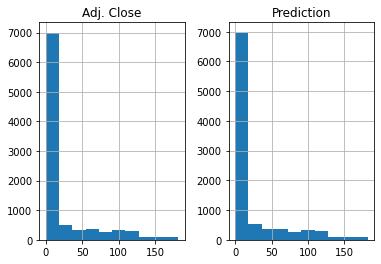

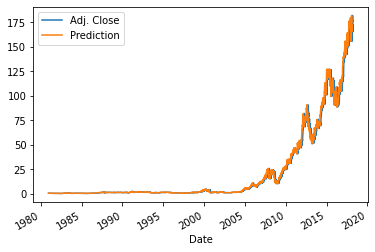

In [0]:
#Clearly two columns have the same values.
stock_data.hist()
stock_data.plot()

In [0]:
#x is an array consisting of Adj. Closevalues, and so we want to drop the Prediction column.
#Also, scale the input values in order to enable the normalization of the data
X = np.array(stock_data.drop(['Prediction'],1))
X = preprocessing.scale(X)

In [0]:
#In our Prediction column, we had NaN values or no value data.
#Set a new input variable to these days and remove them from the X array
#Set  X_forecast equal to last 30
X_forecast = X[-forecast_out]
#Remove last 30 from X
X = X[:-forecast_out]

In [0]:
#To define our output, set it equal to Prediction Column
y = np.array(stock_data["Prediction"])
#Remove the last 30 days since there is no any pricing data
y = y[:-forecast_out]

In [0]:
#Reshape the arrays in order to avoid the error of inconsistent numbers of samples
LinearRegression().fit(X.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#To predict, use train test split. Here is  test_size=20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [0]:
#Initiate Linear Regression model ad fit it with the training data
lin_reg = LinearRegression().fit(X_train,y_train)


In [0]:
#To test the accuracy of the model, the score is used to test the data.
y_predict = lin_reg.predict(X_test)
print("Prediction:",y_predict)

Prediction: [  1.64578154   1.38123538   1.31830567 ...   3.64539378 107.60131004
  32.02275838]
